# Assignment 1

Matrikelnr.: 2089929

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


## Überblick und Data Cleaning

In [2]:
df_stroke_data = pd.read_csv('01_Classification_stroke_data.csv')

In [3]:
df_stroke_data.head(500)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,Unknown,0


Mit der `head()` Funktion sehen wir:
- Es handelt sich scheinbar um Patientendaten. 
- Die Felder bestehen aus verschiedenen Datentypen, u.a. Zahlenwerte (sowohl ganz als auch rational), Zeichenketten.  
- Die Felder `hypertension`, `heart_disease`, `ever_married` und `stroke` scheinen nur aus booleschen Werten zu bestehen (1 und 0 bzw. yes und no). 

Die Spalte `ever_married` hat zwar auch boolesche Werte, allerdings sind diese hier yes und no statt 0 und 1. Wir wandeln yes in 1 und no in 0 um, damit wir die `describe()` Funktion hier nutzen können.

In [4]:
df_stroke_data['ever_married'] = df_stroke_data['ever_married'].replace({'Yes': 1, 'No': 0})
df_stroke_data['gender'] = df_stroke_data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
df_stroke_data['Residence_type'] = df_stroke_data['Residence_type'].replace({'Rural': 0, 'Urban': 1})
df_stroke_data['smoking_status'] = df_stroke_data['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})
df_stroke_data['work_type'] = df_stroke_data['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})

In [5]:
df_stroke_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,43.226614,0.097456,0.054012,0.656164,0.837965,0.508023,106.147677,28.893237,1.388454,0.048728
std,21161.721625,0.492941,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.854067,1.258047,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,33.100000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


Die `describe()` Methode gibt weitere Einblicke in die Daten:
- Alle Spalten haben 5110 Einträge, außer BMI, die 4909 nicht-fehlende Werte hat.
- Das durchschnittliche Alter der Personen im Datensatz beträgt etwa 43,23 Jahre. Die Standardabweichung beträgt hier etwa 22,61. Die jüngste Person ist 0,08 Jahre alt, die älteste 82 Jahre. 25% der Personen im Datensatz sind 25 Jahre alt oder jünger. Der Median des Alters beträgt 45 Jahre. 75% der Personen im Datensatz sind 61 Jahre oder jünger.
- Etwa 5% der Personen im Datensatz haben eine Herzerkrankung. 
- Circa 9,7% der Patienten leiden unter Bluthochdruck.  
- Etwa 65% aller Patienten waren oder sind verheiratet.
- Etwa 4,8% der Patienten hatten einen Schlaganfall.

Jetzt verschaffen wir uns noch einen Überblick über die Spalten, in denen Zeichenketten stehen.

In [6]:
df_stroke_data['gender'].value_counts(normalize=True) * 100

gender
1    58.590998
0    41.389432
2     0.019569
Name: proportion, dtype: float64

Etwa 58% der Patienten sind weiblich, etwa 41% männlich.

In [7]:
df_stroke_data['smoking_status'].value_counts(normalize=True) * 100

smoking_status
0    37.025440
3    30.215264
1    17.318982
2    15.440313
Name: proportion, dtype: float64

Circa 37% der Patienten haben nie geraucht, 15% sind raucher und 17% haben mit dem Rauchen aufgehört. Bei 30% ist nicht bekannt, ob sie jemals geraucht haben oder rauchen. 

In [8]:
df_stroke_data['work_type'].value_counts(normalize=True) * 100

work_type
0    57.240705
1    16.027397
3    13.444227
2    12.857143
4     0.430528
Name: proportion, dtype: float64

Der Großteil aller Personen im Datensatz ist "Privat" beschäftigt, also wahrscheinlich in einem Angestelltenverhältnis.

In [9]:
df_stroke_data['Residence_type'].value_counts(normalize=True) * 100

Residence_type
1    50.802348
0    49.197652
Name: proportion, dtype: float64

Das Verhältnis zwischen Land- und Stadtbewohnern ist recht gleichmäßig, es beträgt nahezu 50%.

Zuletzt entfernen wir noch Nullwerte aus den Daten.

In [10]:
df_stroke_data = df_stroke_data.dropna()

## Aufgabe 1
Apply three different simple machine learning models, which we discussed in lecture 02. Describe your approach, interpret the performance, and justify (based on the results) which machine learning model you would choose.

### Trainings- und Testdatensplit
Zuerst splitte ich den Datensatz in Trainings- und Testdaten. Der Anteil an Testdaten entspricht 30%.

In [26]:
# Aufteilen in Features und Labels
x = df_stroke_data[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]  # Features
y = df_stroke_data.stroke # Label

# Split in Test- und Trainingsdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Decision Tree
Als erstes Modell habe ich den Entscheidungsbaum gewählt.

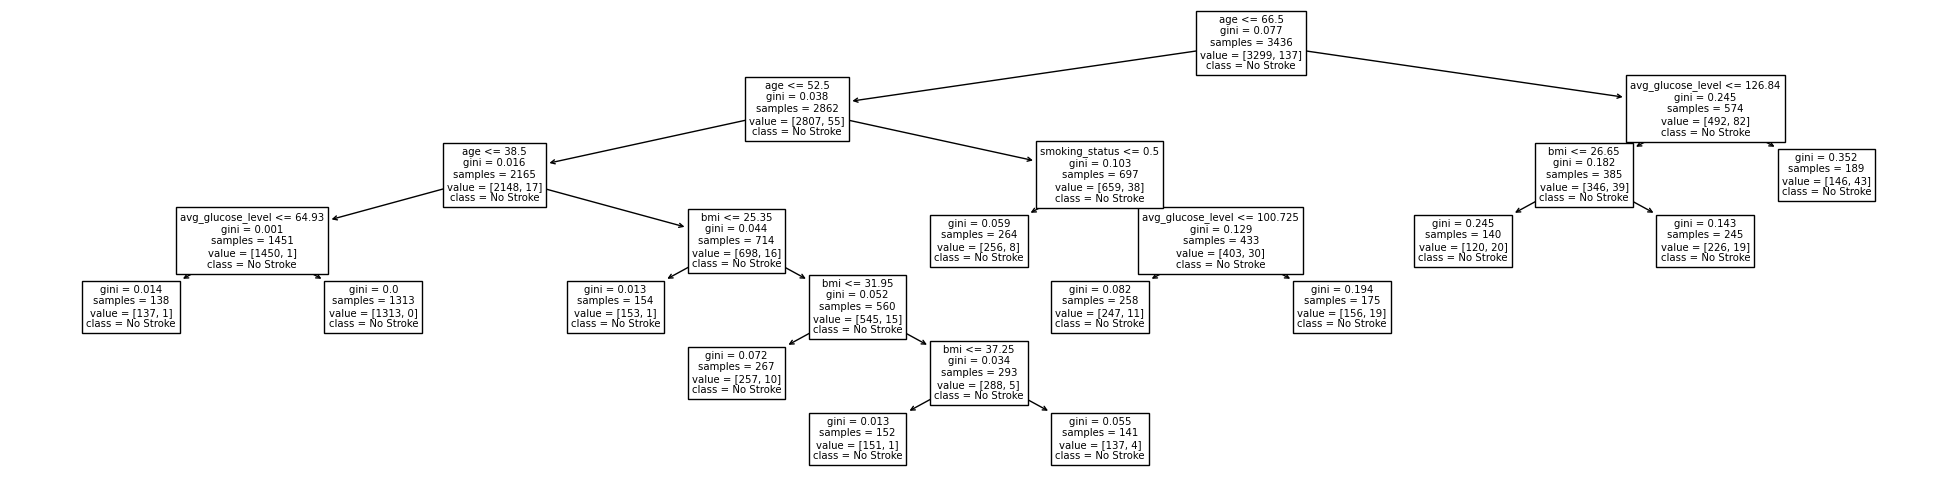

In [32]:
# Erstellen des Entscheidungsbaums mit den Trainingsdaten
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=0.04)
tree = tree.fit(x_train, y_train)

# Vorhersage auf den Testdaten und Bewertung der Genauigkeit
y_pred = tree.predict(x_test)

#Visualisierung des Entscheidungsbaums
fig, ax = plt.subplots(figsize=(25, 6))
plot_tree(tree, feature_names=x.columns.tolist(), ax=ax, class_names=['No Stroke', 'Stroke'])
plt.show()

In [33]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

Accuracy:  0.9511201629327902
Precision:  0.0
Recall:  0.0
F1-Score:  0.0


/Users/leonbittnerprivat/PycharmProjects/DataScienceWS2324/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
